The data is obtained from the Centers of Medicare and Medicaid Services https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Inpatient to add the time component to the analysis I combined 3 datasets from 2015, 2016, and 2017 years. Some of the questions I want to answer:
- Which Diagnostic Related Groups cost Medicare the most?
- What are the most commong hospital discharges? 
- What is the trend in last 3 years?
- Which States and Hospitals charge the most? etc.

Some of the variables:

* DRG Definition - Medicare Severity Diagnosis Related Group
* Total Discharges - The total discharges indicate the number of beneficiaries who were released from the inpatient hospital after receiving care.
* Average Covered Charges -  refers to what the provider bills to Medicare
* Average Total Payments - refers to what Medicare actually pays to the provider as well as co-payment and deductible amounts that the beneficiary is responsible for and payments by third parties for coordination of benefits
* Average Medicare Payments

In [81]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(zipcode)
data(zipcode)
library(VIM)
library(lubridate)

In [82]:
data1 <- read.csv("2015.csv", stringsAsFactors = FALSE, dec=",")
data2 <- read.csv("2016.csv", stringsAsFactors = FALSE, dec=",")
data3 <- read.csv("2017.csv", stringsAsFactors = FALSE, dec=",")

In [83]:
head(data2); # head(data3);  glimpse(data2)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region..HRR..Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,"$1,016,806.46","$296,937.00","$150,139.69"
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,26,"$443,387.54","$215,059.54","$163,889.31"
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,40114,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,"9601 INTERSTATE 630, EXIT 7",LITTLE ROCK,AR,72205,AR - Little Rock,33,"$711,472.00","$180,315.55","$145,192.61"
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,50025,UC SAN DIEGO HEALTH HILLCREST - HILLCREST MED CTR,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,17,"$796,343.82","$299,244.41","$270,131.59"
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,50100,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,CA - San Diego,13,"$1,434,651.46","$239,537.46","$215,205.00"
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,50108,"SUTTER MEDICAL CENTER, SACRAMENTO",2825 CAPITOL AVENUE,SACRAMENTO,CA,95816,CA - Sacramento,11,"$846,688.27","$259,930.18","$257,317.55"


###Add Year variable to the datasets

In [84]:
data1$Year <- 2015
data2$Year <- 2016
data3$Year <- 2017

###I will combine those datasets with rbind. rbind combines datasets by rows. (In order to combine the datasets, the number and the names of the columns must be the same in the datasets)

In [85]:
payment <- rbind(data1, data2, data3)
dim(payment)

[1] 595484     13

Covered charges, medicare payments and total payments contain both $ dollar signs and commas, in order to do data manipulation/aggregation I will convert those variables into numeric values and remove  dollar signs and commas.

In [86]:
payment$Average.Covered.Charges <- as.numeric(gsub("[\\$,]","", payment$Average.Covered.Charges))
payment$Average.Medicare.Payments <- as.numeric(gsub("[\\$,]","", payment$Average.Medicare.Payments))
payment$Average.Total.Payments <- as.numeric(gsub("[\\$,]","", payment$Average.Total.Payments))

###Check for NA values

In [9]:
sum(is.na(payment))

[1] 0

In [186]:
df_top15 <- payment %>% filter(Year == 2015) %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_p = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(Provider.State) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p),
            ratio_paid_charged = sum(total_p)/sum(total_c)) %>% 
  top_n(15, wt = total_charges) %>%  mutate(country_medicare_charges = sum(df_top$total_charges), charges_proportion = total_charges/country_medicare_charges) %>%
  arrange(desc(total_charges))
knitr::kable(df_top15)



|Provider.State | total_charges| total_paid| ratio_paid_charged| country_medicare_charges| charges_proportion|
|:--------------|-------------:|----------:|------------------:|------------------------:|------------------:|
|CA             |   46666346262| 7195633853|          0.1541932|             279908313918|          0.1667201|
|FL             |   36735867281| 5317075694|          0.1447380|             279908313918|          0.1312425|
|TX             |   30328782208| 4852557591|          0.1599984|             279908313918|          0.1083526|
|NY             |   23681227219| 5830112900|          0.2461913|             279908313918|          0.0846035|
|NJ             |   21278577557| 2915478166|          0.1370147|             279908313918|          0.0760198|
|PA             |   19669234518| 3248294129|          0.1651459|             279908313918|          0.0702703|
|IL             |   15731786270| 3174370684|          0.2017807|             279908313918|          0.0562034|

In [183]:
df_top16 <- payment %>% filter(Year == 2016) %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_p = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(Provider.State) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p),
            ratio_paid_charged = sum(total_p)/sum(total_c)) %>% 
  top_n(15, wt = total_charges) %>%  mutate(country_medicare_charges = sum(df_top$total_charges), charges_proportion = total_charges/country_medicare_charges) %>%
  arrange(desc(total_charges))
knitr::kable(df_top16)



|Provider.State | total_charges| total_paid| ratio_paid_charged| country_medicare_charges| charges_proportion|
|:--------------|-------------:|----------:|------------------:|------------------------:|------------------:|
|CA             |   49439930287| 7612762249|          0.1539800|             279908313918|          0.1766290|
|FL             |   37771881595| 5260908665|          0.1392811|             279908313918|          0.1349438|
|TX             |   31902057391| 4872741662|          0.1527407|             279908313918|          0.1139732|
|NY             |   25245765376| 5993313850|          0.2373988|             279908313918|          0.0901930|
|NJ             |   20910891080| 2925437367|          0.1399002|             279908313918|          0.0747062|
|PA             |   20162510062| 3308563290|          0.1640948|             279908313918|          0.0720326|
|IL             |   15897443790| 3192762240|          0.2008349|             279908313918|          0.0567952|

In [187]:
df_top17 <- payment %>% filter(Year == 2017) %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_p = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(Provider.State) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p),
            ratio_paid_charged = sum(total_p)/sum(total_c)) %>% 
  top_n(15, wt = total_charges) %>%  mutate(country_medicare_charges = sum(df_top$total_charges), charges_proportion = total_charges/country_medicare_charges) %>%
  arrange(desc(total_charges))
knitr::kable(df_top17)



|Provider.State | total_charges| total_paid| ratio_paid_charged| country_medicare_charges| charges_proportion|
|:--------------|-------------:|----------:|------------------:|------------------------:|------------------:|
|CA             |   54238882335| 8130260062|          0.1498973|             279908313918|          0.1937737|
|FL             |   40512981303| 5361111801|          0.1323307|             279908313918|          0.1447366|
|TX             |   33869714703| 4981748301|          0.1470856|             279908313918|          0.1210029|
|NY             |   27648180203| 6201262986|          0.2242919|             279908313918|          0.0987758|
|PA             |   21342203052| 3384679967|          0.1585909|             279908313918|          0.0762471|
|NJ             |   20787093641| 2897560398|          0.1393923|             279908313918|          0.0742639|
|IL             |   16964249266| 3320097855|          0.1957115|             279908313918|          0.0606065|

Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.


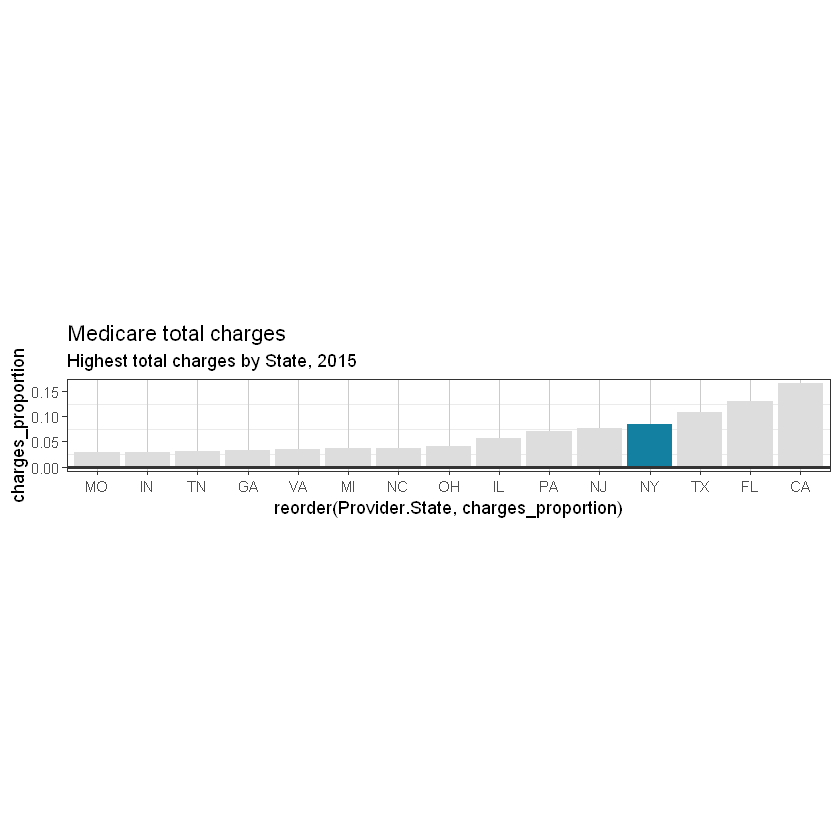

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


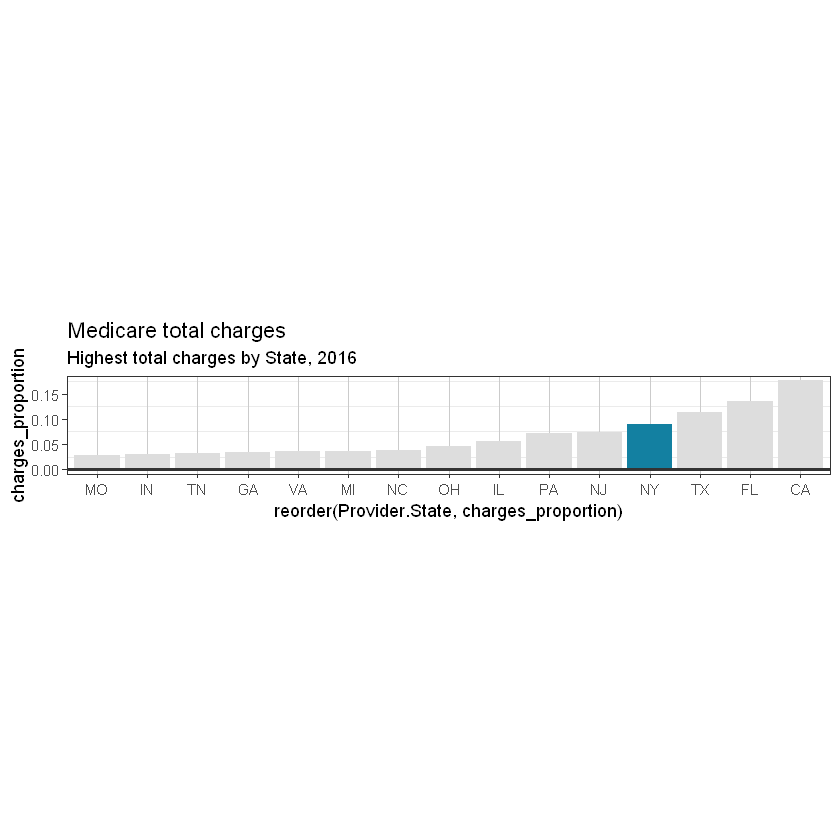

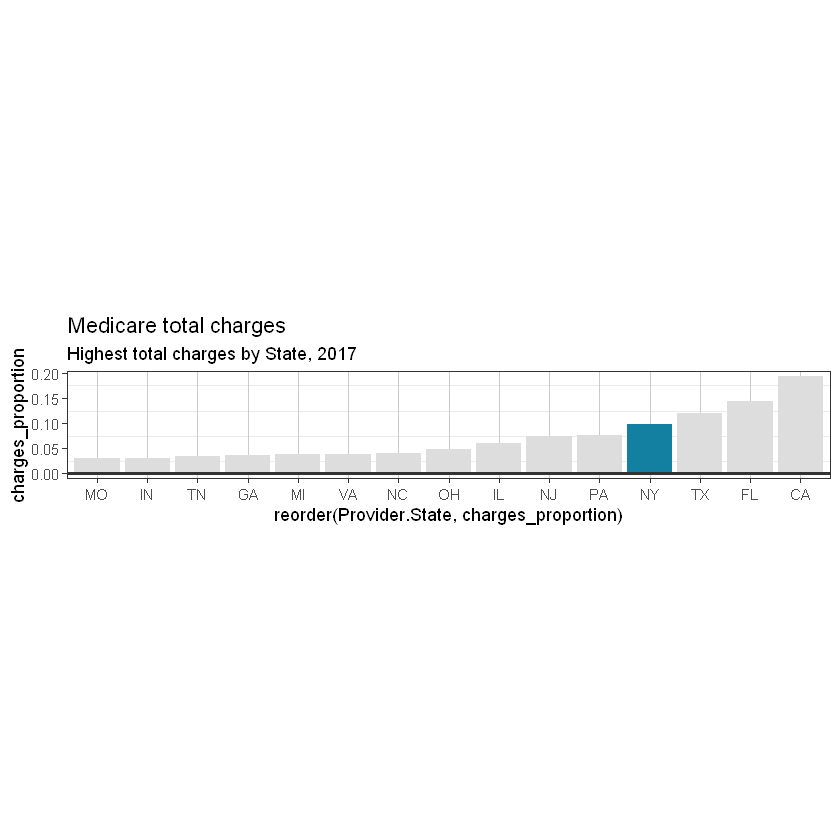

In [190]:
nata <- ggplot(df_top15, 
       aes(x = reorder(Provider.State, charges_proportion), y = charges_proportion)) + 
  geom_bar(stat="identity", position="identity", fill=ifelse(df_top$Provider.State == "NY", "#1380A1", "#dddddd")) +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  theme_bw() +
  coord_flip() +
  labs(title="Medicare total charges",
       subtitle = "Highest total charges by State, 2015") +
  theme(panel.grid.major.x = element_line(color="#cbcbcb"), 
        panel.grid.major.y=element_blank())

santa <- ggplot(df_top16, 
       aes(x = reorder(Provider.State, charges_proportion), y = charges_proportion)) + 
  geom_bar(stat="identity", position="identity", fill=ifelse(df_top$Provider.State == "NY", "#1380A1", "#dddddd")) +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  theme_bw() +
  coord_flip() +
  labs(title="Medicare total charges",
       subtitle = "Highest total charges by State, 2016") +
  theme(panel.grid.major.x = element_line(color="#cbcbcb"), 
        panel.grid.major.y=element_blank())

marina <- ggplot(df_top17, 
       aes(x = reorder(Provider.State, charges_proportion), y = charges_proportion)) + 
  geom_bar(stat="identity", position="identity", fill=ifelse(df_top$Provider.State == "NY", "#1380A1", "#dddddd")) +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  theme_bw() +
  coord_flip() +
  labs(title="Medicare total charges",
       subtitle = "Highest total charges by State, 2017") +
  theme(panel.grid.major.x = element_line(color="#cbcbcb"), 
        panel.grid.major.y=element_blank())

 nata + coord_fixed(ratio=10)
santa + coord_fixed(ratio=10)
marina + coord_fixed(ratio=10)

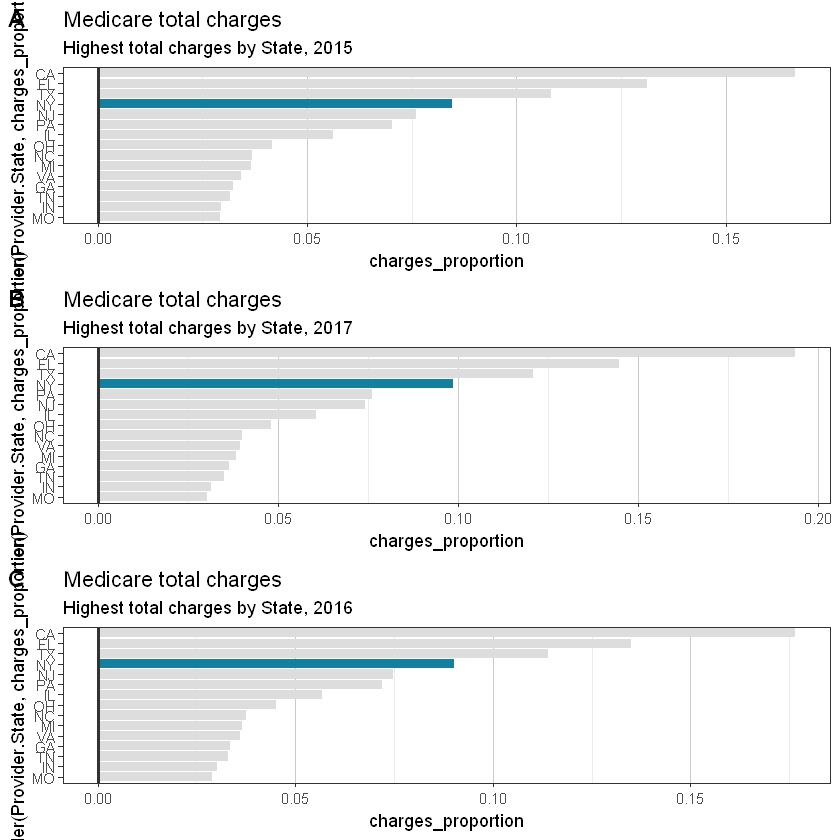

In [199]:
#ggarrange(nata, marina, santa) 
ggarrange(nata, marina, santa,
                    labels = c("A", "B", "C"),
                    ncol = 1, nrow = 3)

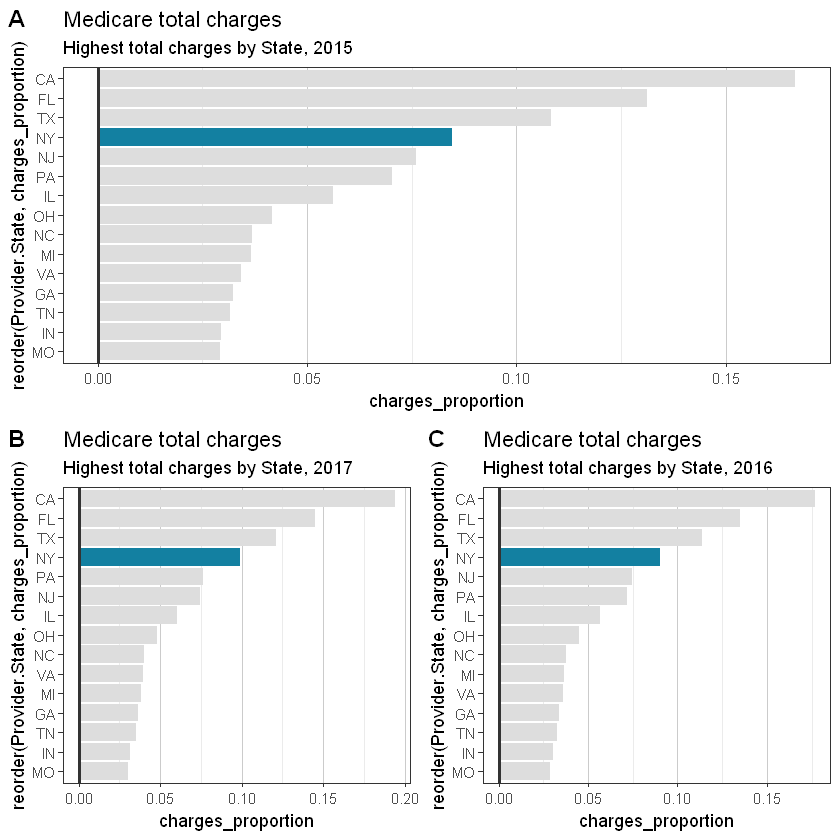

In [197]:
ggarrange(
  nata,                # First row with line plot
  # Second row with box and dot plots
  ggarrange(marina, santa, ncol = 2, labels = c("B", "C")), 
  nrow = 2, 
  labels = "A"       # Label of the line plot
  ) 

In [193]:
library(ggpubr)
theme_set(theme_pubr())

In [166]:
total.mediare.payments <- payment %>% group_by(Provider.State) %>% 
mutate(total.medicare.payments = sum(Average.Medicare.Payments))

head(total.mediare.payments)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region..HRR..Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,Year,total.medicare.payments
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,11,1014783.4,171081.2,141193.9,2015,106835420
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,28,382051.0,194081.4,167512.0,2015,127442565
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,50025,UNIVERSITY OF CALIFORNIA SAN DIEGO MEDICAL CENTER,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,21,971881.5,324050.7,294419.6,2015,717408234
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,50100,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,CA - San Diego,18,1517857.6,257177.3,233532.8,2015,717408234
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,50108,"SUTTER MEDICAL CENTER, SACRAMENTO",2825 CAPITOL AVENUE,SACRAMENTO,CA,95816,CA - Sacramento,17,1470341.1,346150.1,338472.0,2015,717408234
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,19,1450590.6,449486.1,404408.7,2015,717408234


First I will calculate the U.S average total discharges, covered charges, total payments and medicare payments for years 2015, 2016 and 2017.

In [91]:
us.total <- payment %>% group_by(Year) %>%
        summarise(
                  us.mean.total.discharges          = mean(Total.Discharges),
                  us.mean.average.covered.charges   = mean(Average.Covered.Charges),
                  us.mean.average.total.payments    = mean(Average.Total.Payments),
                  us.mean.average.medicare.payments = mean(Average.Medicare.Payments))
                  
dim(us.total); head(us.total)

[1] 3 5

Year,us.mean.total.discharges,us.mean.average.covered.charges,us.mean.average.total.payments,us.mean.average.medicare.payments
2015,36.82096,55008.66,13219.57,11213.91
2016,36.64338,58231.57,13728.46,11656.63
2017,37.60442,61166.15,13978.19,11816.24


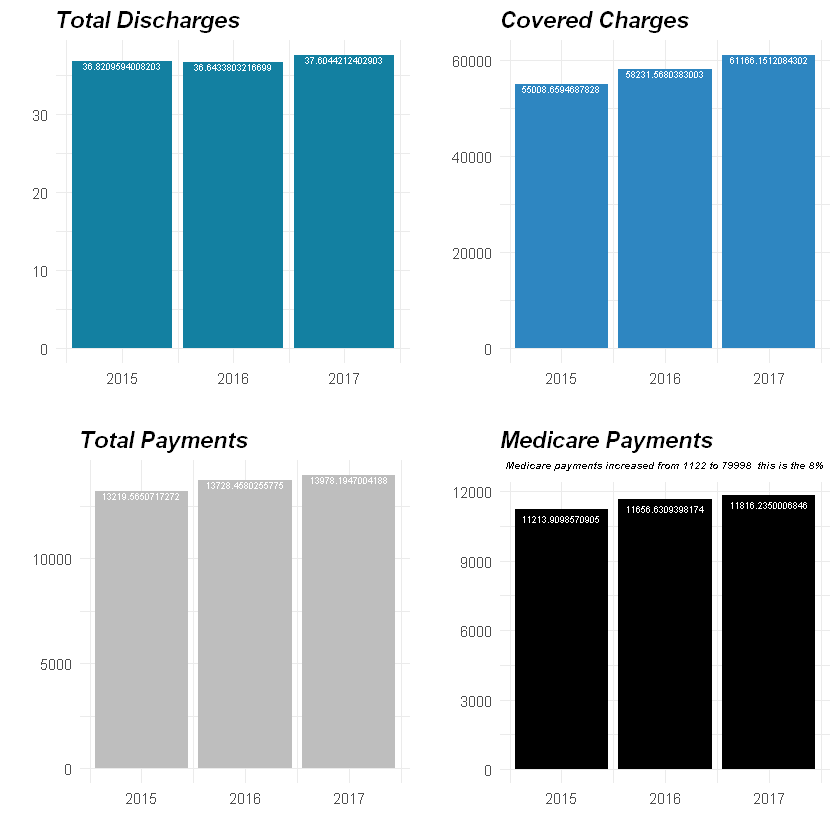

In [286]:
a<-ggplot(data=us.total, aes(x=Year, y=us.mean.total.discharges)) +
  geom_bar(stat="identity", fill="#1380A1")+
  geom_text(aes(label=us.mean.total.discharges), vjust=1, color="white", size=2)+
  ggtitle("Total Discharges") +
  xlab("") + ylab("")+
  theme_minimal()+
theme(plot.title = element_text(color="black", size=14, face="bold.italic"))

b<-ggplot(data=us.total, aes(x=Year, y=us.mean.average.covered.charges)) +
  geom_bar(stat="identity", fill="#2E86C1")+
  geom_text(aes(label=us.mean.average.covered.charges), vjust=1, color="white", size=2)+
   ggtitle("Covered Charges") +
  xlab("") + ylab("")+
  theme_minimal()+
  theme(plot.title = element_text(color="black", size=14, face="bold.italic"))

c<-ggplot(data=us.total, aes(x=Year, y=us.mean.average.total.payments)) +
  geom_bar(stat="identity", fill="grey")+
   geom_text(aes(label=us.mean.average.total.payments), vjust=1, color="white", size=2)+
   ggtitle("Total Payments") +
  xlab("") + ylab("")+
  theme_minimal() + theme(plot.title = element_text(color="black", size=14, face="bold.italic"))

p<-ggplot(data=us.total, aes(x=Year, y=us.mean.average.medicare.payments)) +
  geom_bar(stat="identity", fill="black")+
 geom_text(aes(label=us.mean.average.medicare.payments), vjust=1.6, color="white", size=2)+
 ggtitle("Medicare Payments") +
  xlab("") + ylab("")+ labs(title = "Medicare Payments",
        subtitle = "Medicare payments increased from 1122 to 79998  this is the 8%")+
  theme_minimal() + theme(
 plot.title = element_text(color="black", size=14, face="bold.italic"), plot.subtitle = element_text(hjust = 0.5, size=6, color = "black", face = "bold.italic"))
      
      
#sul <- c('2015', '2016', '2017')
#p <- ggplot(data=us.total, aes(x=Year, y=us.mean.average.medicare.payments, fill=sul)) +
#  geom_bar(stat="identity", position=position_dodge())+
#  scale_fill_brewer(palette="Paired")+
#  theme_minimal()

#ggarrange(nata, marina, santa) 
ggarrange(a, b, c, p,
                   # labels = c("A", "B", "C", "D"),
                    ncol = 2, nrow = 2, widths = 0.2, heights = 0.5) 

                             #tu gvinda amovatrialot  + coord_flip()

What is the average total discharges, covered charges, total payments and medicare payments for each State in 2017

In [95]:
by.state <- payment %>% group_by(Provider.State) %>% filter(Year == 2017) %>%
        summarise(count =n(),
                  state.mean.total.discharges          = mean(Total.Discharges),
                  state.mean.average.covered.charges   = mean(Average.Covered.Charges),
                  state.mean.average.total.payments    = mean(Average.Total.Payments),
                  state.mean.average.medicare.payments = mean(Average.Medicare.Payments))
                  
                                            
dim(by.state); head(by.state)

[1] 51  6

Provider.State,count,state.mean.total.discharges,state.mean.average.covered.charges,state.mean.average.total.payments,state.mean.average.medicare.payments
AK,267,28.76779,87564.27,21367.49,18712.589
AL,3916,36.27681,54725.17,10519.97,8706.915
AR,2488,36.83883,42548.17,10883.90,9332.545
AZ,3407,33.76548,71446.32,14886.30,12908.001
CA,15216,34.90628,106406.99,18417.93,16207.739
CO,2208,33.28986,81883.65,14994.47,12584.929


I will include countrie's average variables to the dataset.

In [16]:
by.state$us.mean.total.discharges <- us.total$us.mean.total.discharges
by.state$us.mean.average.covered.charges <- us.total$us.mean.average.covered.charges
by.state$us.mean.average.total.payments <- us.total$us.mean.average.total.payments
by.state$us.mean.average.medicare.payments <- us.total$us.mean.average.medicare.payments

RATIOS - state average metrics / Country average metrics

In [17]:
state.average.ratios <- by.state %>% group_by(Provider.State) %>%
 mutate(ratio.state.discharges = state.mean.total.discharges/us.mean.total.discharges,
       ratio.covered.charges = state.mean.average.covered.charges/us.mean.average.covered.charges,
       ratio.total.payments = state.mean.average.total.payments /us.mean.average.total.payments,
       ratio.medicare.payments = state.mean.average.medicare.payments/us.mean.average.medicare.payments)

head(by.state)

Provider.State,count,state.mean.total.discharges,state.mean.average.covered.charges,state.mean.average.total.payments,state.mean.average.medicare.payments,us.mean.total.discharges,us.mean.average.covered.charges,us.mean.average.total.payments,us.mean.average.medicare.payments
AK,787,27.81830,82591.99,20367.27,18024.084,37.02043,58106.47,13638.27,11559.16
AL,12411,36.51092,51936.37,10252.66,8608.123,37.02043,58106.47,13638.27,11559.16
AR,7455,36.56660,40829.99,10728.62,9202.513,37.02043,58106.47,13638.27,11559.16
AZ,10245,33.04226,67452.55,14363.89,12439.489,37.02043,58106.47,13638.27,11559.16
CA,45431,33.86711,102112.97,17906.99,15791.161,37.02043,58106.47,13638.27,11559.16
CO,6719,31.90207,74810.15,14180.59,11971.441,37.02043,58106.47,13638.27,11559.16


Average Covered Charges

In [18]:
us.states <- state.average.ratios %>%
        select(Provider.State, ratio.covered.charges) %>%
        arrange(ratio.covered.charges) %>%
        mutate(Avg = mean(1, na.rm = TRUE),
               Ratio = ifelse(ratio.covered.charges - Avg > 0, "Above the Countrie's Average", "Below the Countrie's Average")) %>%
arrange(desc(ratio.covered.charges))
dim(us.states)
head(us.states, 15)

[1] 51  4

Provider.State,ratio.covered.charges,Avg,Ratio
CA,1.7573426,1,Above the Countrie's Average
NV,1.6576461,1,Above the Countrie's Average
NJ,1.5281179,1,Above the Countrie's Average
AK,1.4213907,1,Above the Countrie's Average
DC,1.3060446,1,Above the Countrie's Average
CO,1.2874668,1,Above the Countrie's Average
FL,1.2384006,1,Above the Countrie's Average
TX,1.1667570,1,Above the Countrie's Average
AZ,1.1608441,1,Above the Countrie's Average
PA,1.1406561,1,Above the Countrie's Average


In [19]:
covered.charges <- ggplot(us.states, aes(ratio.covered.charges, Provider.State, color = Ratio)) +
        geom_segment(aes(x = Avg, y = Provider.State, xend = ratio.covered.charges, yend = Provider.State), color = "grey50") +
        geom_point()+ 
        labs(title = "Total Covered Charges by State")+
        theme_minimal() +
        theme(axis.title = element_blank())

Average Medicare payment

In [20]:
us.states <- state.average.ratios %>%
        select(Provider.State, ratio.medicare.payments) %>%
        arrange(ratio.medicare.payments) %>%
        mutate(Avg2 = mean(1, na.rm = TRUE),
               Ratio = ifelse(ratio.medicare.payments - Avg2 > 0, "Above the Countrie's Average", "Below the Countrie's Average"))%>%
             arrange(desc(ratio.medicare.payments))
head(us.states, 15)

Provider.State,ratio.medicare.payments,Avg2,Ratio
AK,1.559290,1,Above the Countrie's Average
CA,1.366116,1,Above the Countrie's Average
DC,1.350595,1,Above the Countrie's Average
MD,1.348789,1,Above the Countrie's Average
HI,1.315449,1,Above the Countrie's Average
NY,1.259574,1,Above the Countrie's Average
OR,1.189392,1,Above the Countrie's Average
MA,1.173011,1,Above the Countrie's Average
MN,1.160864,1,Above the Countrie's Average
WA,1.133437,1,Above the Countrie's Average


In [279]:
medicare.payments <- ggplot(us.states, aes(ratio.medicare.payments, Provider.State, color = Ratio)) +
        geom_segment(aes(x = Avg2, y = Provider.State, xend = ratio.medicare.payments, yend = Provider.State), color = "grey50") +
        geom_point()+ 
        labs(title = "Medicare Payments by State")+
        theme_minimal() +
        theme(axis.title = element_blank()) 
#medicare.payments

In [24]:
require(gridExtra)

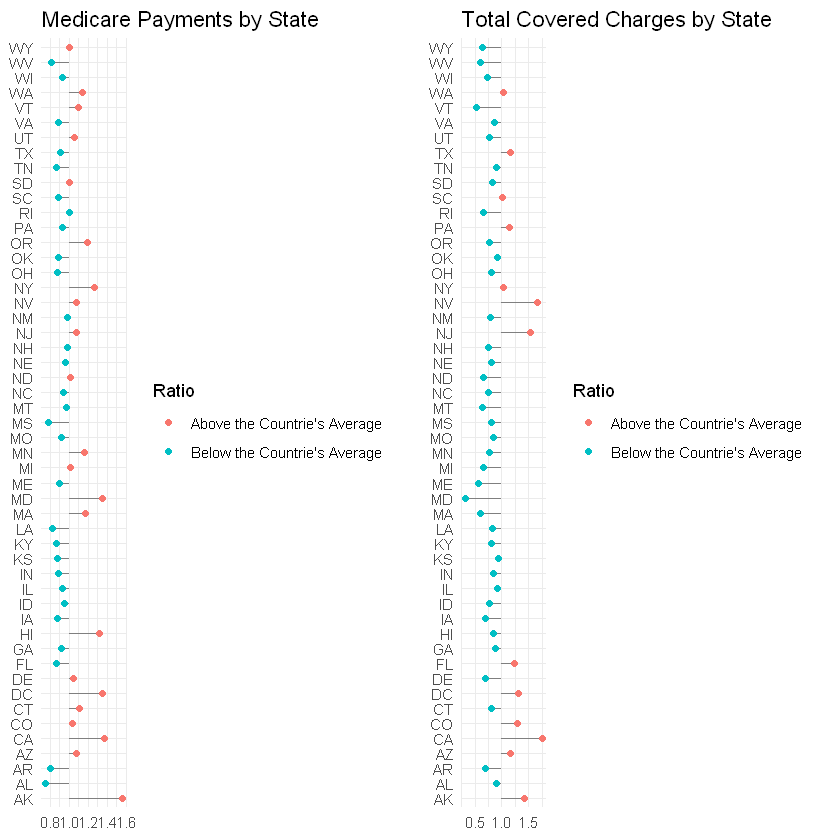

In [280]:
grid.arrange(medicare.payments, covered.charges, ncol=2)


In [75]:
library(cluster)


In [28]:
payment <- as.data.frame(payment)

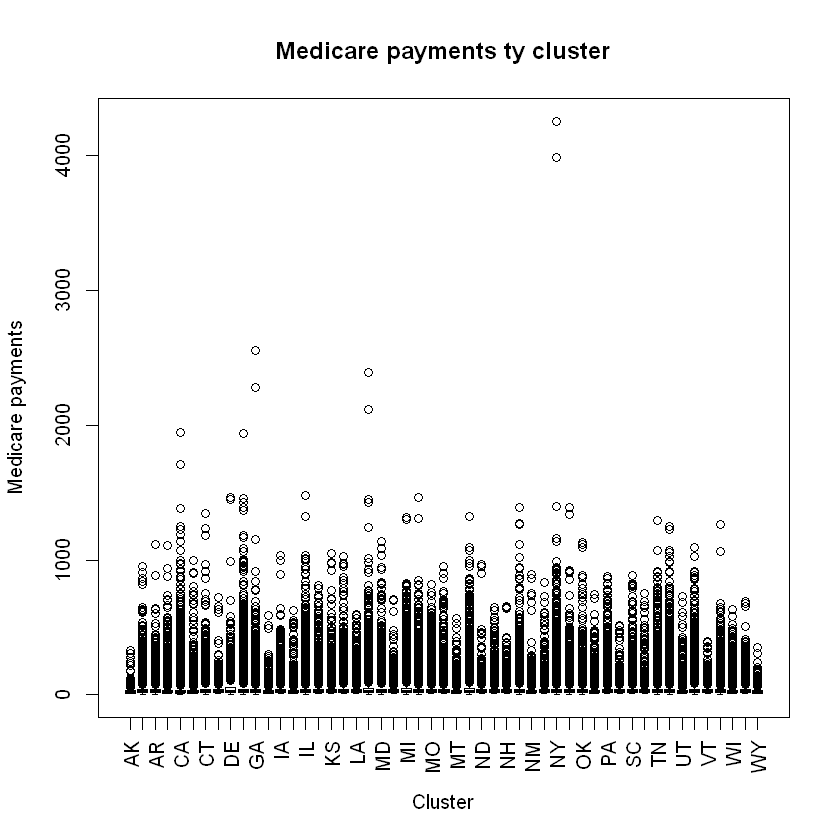

In [43]:
p1 <- boxplot(payment$Total.Discharges ~ payment$Provider.State, par(las=3), 
        xlab='Cluster', ylab='Medicare payments',
        main='Medicare payments ty cluster')

Analyzing Average Provider Charges and Medicare Payments

In [56]:
df_top <- payment %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_p = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(Provider.Name) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p),
            ratio_paid_charged = sum(total_p)/sum(total_c)) %>% 
  top_n(10, wt = total_charges) %>%
  arrange(desc(total_charges))

knitr::kable(df_top)



|Provider.Name                    | total_charges| total_paid| ratio_paid_charged|
|:--------------------------------|-------------:|----------:|------------------:|
|CEDARS-SINAI MEDICAL CENTER      |   10891534772| 1135096549|          0.1042182|
|FLORIDA HOSPITAL                 |    8269513404| 1111528470|          0.1344128|
|NEW YORK-PRESBYTERIAN HOSPITAL   |    7797460777| 1766867375|          0.2265952|
|STANFORD HEALTH CARE             |    6384629917|  837505387|          0.1311752|
|UPMC PRESBYTERIAN SHADYSIDE      |    5833721453|  550827037|          0.0944212|
|METHODIST HOSPITAL               |    5432957684|  760590585|          0.1399957|
|MASSACHUSETTS GENERAL HOSPITAL   |    4334294154|  987901837|          0.2279268|
|UCSF MEDICAL CENTER              |    4087111977|  729658063|          0.1785266|
|HOSPITAL OF UNIV OF PENNSYLVANIA |    4080280869|  570248684|          0.1397572|
|GOOD SAMARITAN HOSPITAL          |    3991707913|  579542003|          0.1451865|

Cedar-Sinai Medical Center had far and away the most billing to Medicare

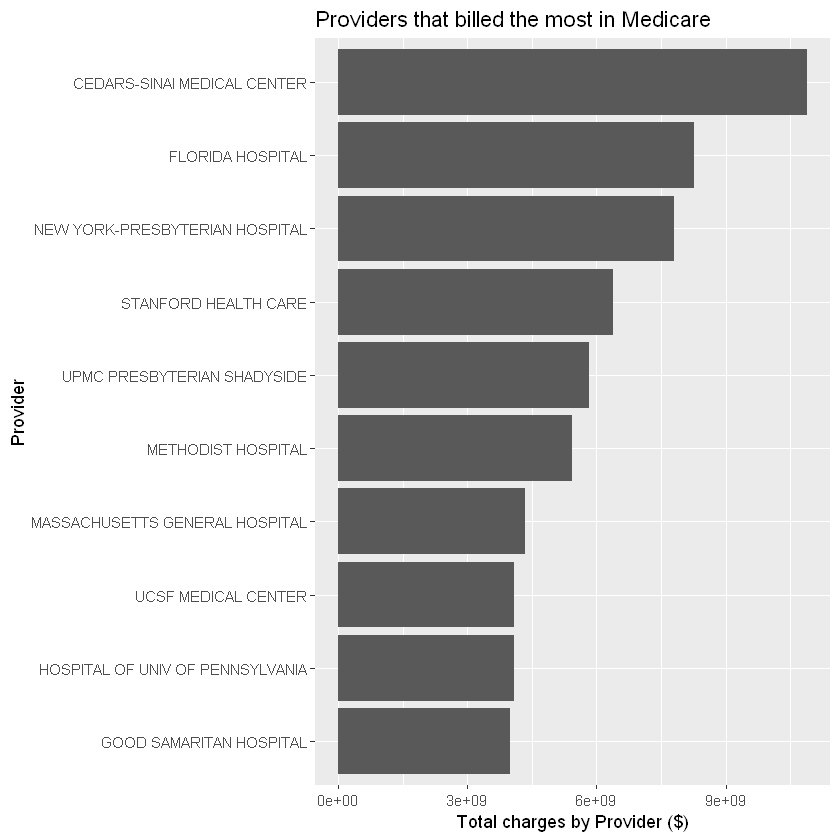

In [57]:
df_top %>% ggplot(aes(x=reorder(Provider.Name, total_charges), y=total_charges)) +
  geom_bar(stat='identity') +
  xlab("Provider") +
  ylab("Total charges by Provider ($)") +
  ggtitle("Providers that billed the most in Medicare") +
  coord_flip()

The Most Expensive DRG Codes Across Medicare

In [58]:
df_top <- payment %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_p = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(DRG.Definition) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p),
            ratio_paid_charged = sum(total_p)/sum(total_c)) %>% 
  top_n(10, wt = total_charges) %>%
  arrange(desc(total_charges))

knitr::kable(df_top)



|DRG.Definition                                                            | total_charges|  total_paid| ratio_paid_charged|
|:-------------------------------------------------------------------------|-------------:|-----------:|------------------:|
|470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC  |   84930404714| 17029623828|          0.2005127|
|871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                  |   65230094039| 13057983699|          0.2001834|
|853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC              |   36560676172|  7975988638|          0.2181576|
|291 - HEART FAILURE & SHOCK W MCC                                         |   35176241332|  7654986024|          0.2176181|
|871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                  |   28299401092|  6088127660|          0.2151327|
|460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC                               |   26061078385|  5578328542|          0.2140483

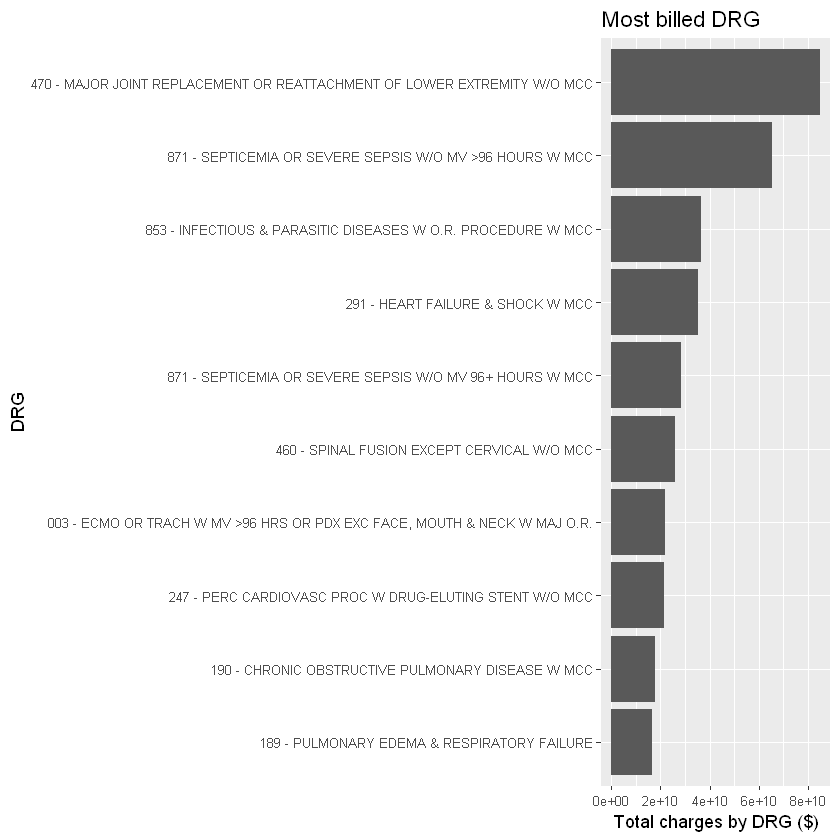

In [59]:
df_top %>% ggplot(aes(x=reorder(DRG.Definition, total_charges), y=total_charges)) +
  geom_bar(stat='identity') +
  xlab("DRG") +
  ylab("Total charges by DRG ($)") +
  theme(axis.text = element_text(size = 8)) +
  ggtitle("Most billed DRG") +
  coord_flip()

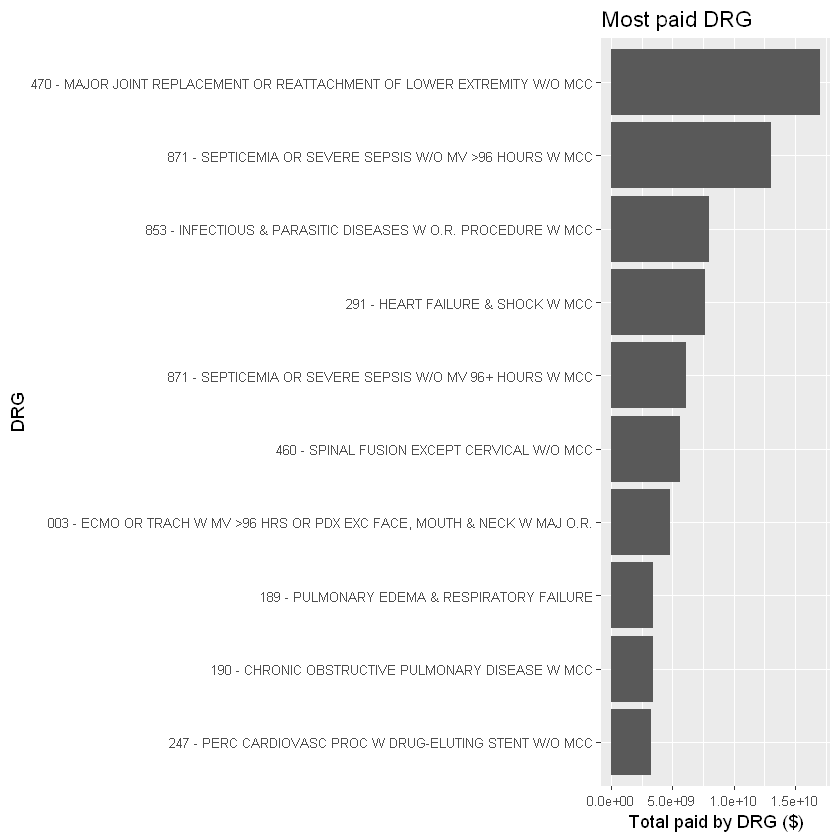

In [60]:
df_top %>% arrange(desc(total_paid)) %>% 
  ggplot(aes(x=reorder(DRG.Definition, total_paid), y=total_paid)) +
  geom_bar(stat='identity') +
  xlab("DRG") +
  ylab("Total paid by DRG ($)") +
  theme(axis.text = element_text(size = 8)) +
  ggtitle("Most paid DRG") +
  coord_flip()


Most expensive DRG-S

In [64]:
df_top <- payment %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_p = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(DRG.Definition) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p),
            ratio_paid_charged = sum(total_p)/sum(total_c)) %>%
  arrange(desc(total_charges))

knitr::kable(df_top)



|DRG.Definition                                                             | total_charges|   total_paid| ratio_paid_charged|
|:--------------------------------------------------------------------------|-------------:|------------:|------------------:|
|470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC   |  8.493040e+10| 1.702962e+10|          0.2005127|
|871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                   |  6.523009e+10| 1.305798e+10|          0.2001834|
|853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC               |  3.656068e+10| 7.975989e+09|          0.2181576|
|291 - HEART FAILURE & SHOCK W MCC                                          |  3.517624e+10| 7.654986e+09|          0.2176181|
|871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                   |  2.829940e+10| 6.088128e+09|          0.2151327|
|460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC                                |  2.606108e+10| 5.578329e+09|   

In [11]:
drg.by.state <- payment %>% group_by(DRG.Definition, Provider.State, Year) %>%
        summarise(count =n(),
                  State.mean.total.discharges          = mean(Total.Discharges),
                  State.mean.average.covered.charges   = mean(Average.Covered.Charges),
                  State.mean.average.total.payments    = mean(Average.Total.Payments),
                  State.mean.average.medicare.payments = mean(Average.Medicare.Payments))
                 
dim(drg.by.state); 

[1] 46356     8

In [155]:
#head(drg.by.state)

In [12]:
usstates1 <- payment %>%
  group_by(Provider.State) %>% filter(Year == 2015) %>%
  summarize(totalcost = sum(Average.Covered.Charges, na.rm =TRUE))%>%
  mutate(percent = (totalcost/sum(totalcost))*100)%>%
  arrange(desc(totalcost))

head(usstates1, 10)
usstates1 <- payment %>%
  group_by(Provider.State) %>% filter(Year == 2016) %>%
  summarize(totalcost = sum(Average.Covered.Charges, na.rm =TRUE))%>%
  mutate(percent = (totalcost/sum(totalcost))*100)%>%
  arrange(desc(totalcost))

head(usstates1, 10)

usstates1 <- payment %>%
  group_by(Provider.State) %>% filter(Year == 2017) %>%
  summarize(totalcost = sum(Average.Covered.Charges, na.rm =TRUE))%>%
  mutate(percent = (totalcost/sum(totalcost))*100)%>%
  arrange(desc(totalcost))

head(usstates1, 10)

Provider.State,totalcost,percent
CA,1476417090,13.295152
FL,1043924734,9.400554
TX,903280136,8.134048
NY,622842762,5.608706
PA,607312763,5.468858
NJ,588864040,5.302727
IL,468739789,4.221007
OH,347818153,3.132106
GA,275049708,2.476826
MI,270847939,2.438989


Provider.State,totalcost,percent
CA,1543588503,13.436414
FL,1085126069,9.445654
TX,946373103,8.237857
NY,662826978,5.769684
PA,616029882,5.362331
NJ,585908481,5.100135
IL,474406700,4.129549
OH,369976137,3.220517
GA,284286871,2.474621
VA,277670938,2.417031


Provider.State,totalcost,percent
CA,1619088701,13.482918
FL,1137603834,9.473365
TX,989987617,8.244095
NY,693400053,5.774270
PA,642160074,5.347571
NJ,569842839,4.745351
IL,493844773,4.112479
OH,387530017,3.227146
GA,302108690,2.515802
VA,297896863,2.480728


In [183]:
my.bloody.theme <- within(trellis.par.get(), {    # Initialize theme with default value
  axis.line$col <- NA                             # Remove axes
  plot.polygon <- within(plot.polygon, {
    col <- "#8A0606"                              # Set bar colors to a nice bloody red
    border <- NA                                  # Remove bars' outline
  })
  axis.text$cex <- 1                              # Default axis text size is a bit small. Make it bigger
  layout.heights <- within(layout.heights, {
    bottom.padding <- 0                           # Remove bottom padding
    axis.bottom <- 0                              # Remove axis padding at the bottom of the graph
    axis.top <- 0                                 # Remove axis padding at the top of the graph
  })
})

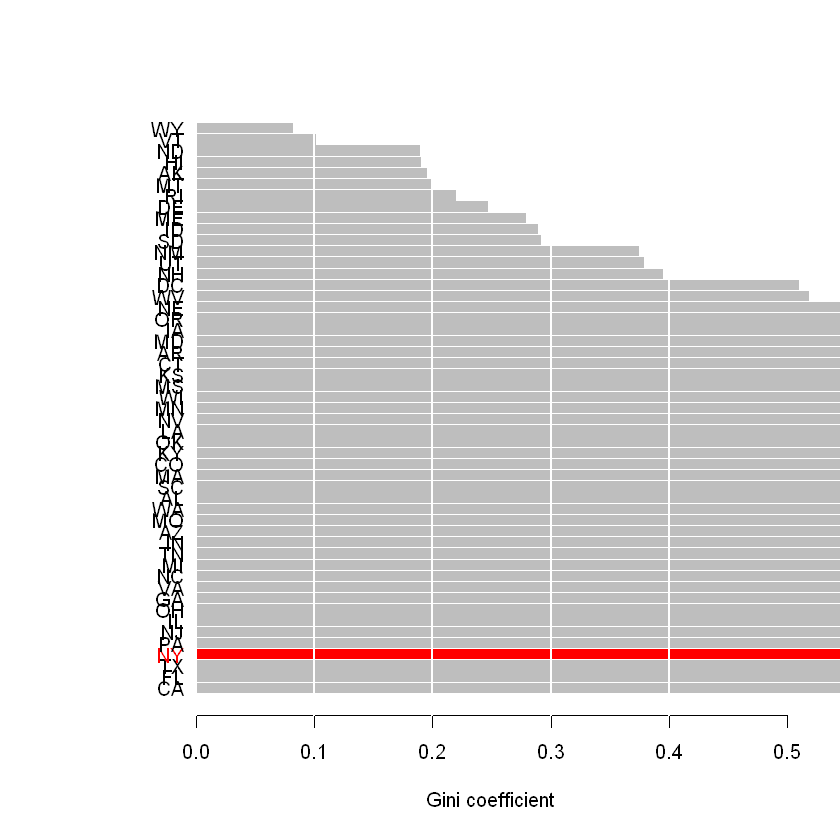

In [196]:
par(mar = c(5, 8, 4, 2) + 0.2)

# Specify colours for the bars and bar borders
border.vec <- color.vec <- rep("grey", 53)
# Specify colours of text labels for the bars
country.vec <- rep("black", 53) 

# Change bar and text colour to red for United Kingdom
index <- which(usstates1$Provider.State == "NY")
border.vec[index] <- 
  color.vec[index] <- 
  country.vec[index] <- "red"

# leave out x-axis labelling in the main barplot...
bp <- barplot(usstates1$percent, 
        las = 1,
        xlab="Gini coefficient",
        horiz = TRUE,
        border = border.vec,
        col = color.vec,
        xlim = c(0, 0.5),
        xaxp = c(0, 0.5, 5))
abline(v=seq(0, 0.4, by=0.1), col='white', lwd=2)

#... and add it in manually at the end
text(y = bp, x = -0.01, 
     labels = usstates1$Provider.State ,
      xpd = TRUE, col = country.vec, adj = 1)

The following objects are masked from usstates1 (pos = 3):

    percent, Provider.State, totalcost



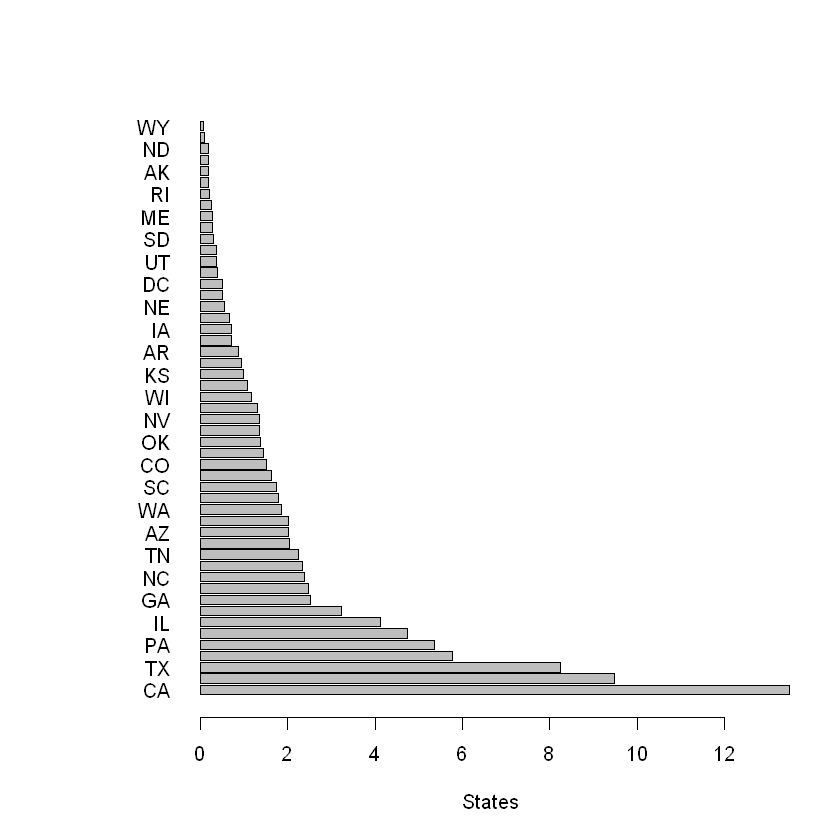

In [187]:
attach(usstates1)
       par(mar = c(5, 8, 4, 2) + 0.1)
barplot(percent, 
        names.arg = Provider.State,
        xlab="States",
        horiz = TRUE,
        las = 1)

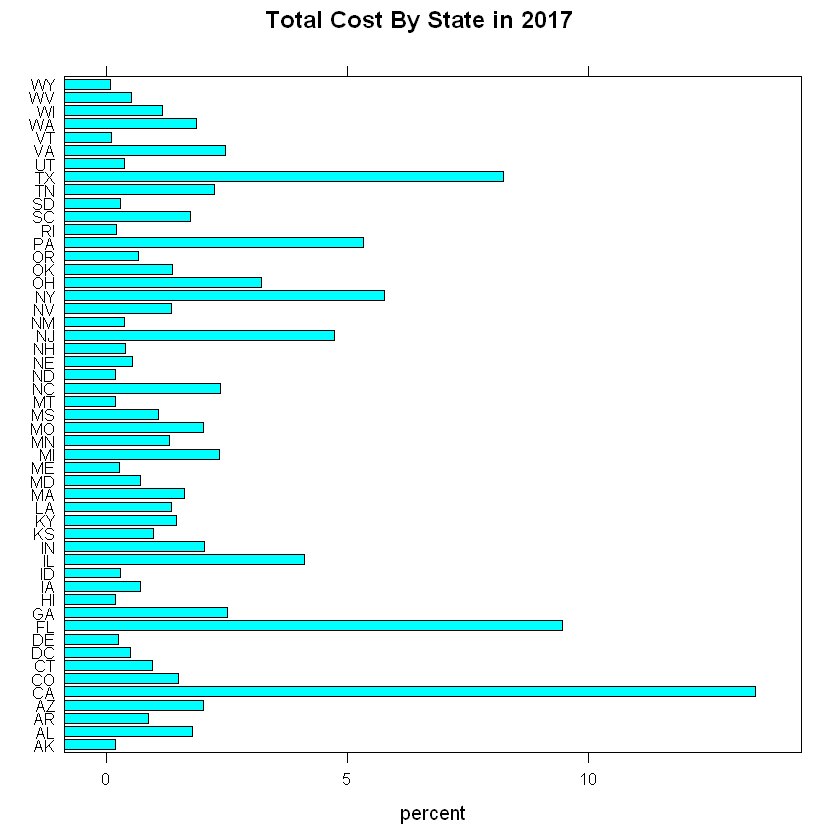

In [182]:
graph <- barchart(Provider.State ~ percent, data = usstates1, 
                   decreasing = TRUE, box.width=0.75, main='Total Cost By State in 2017')
print(graph)

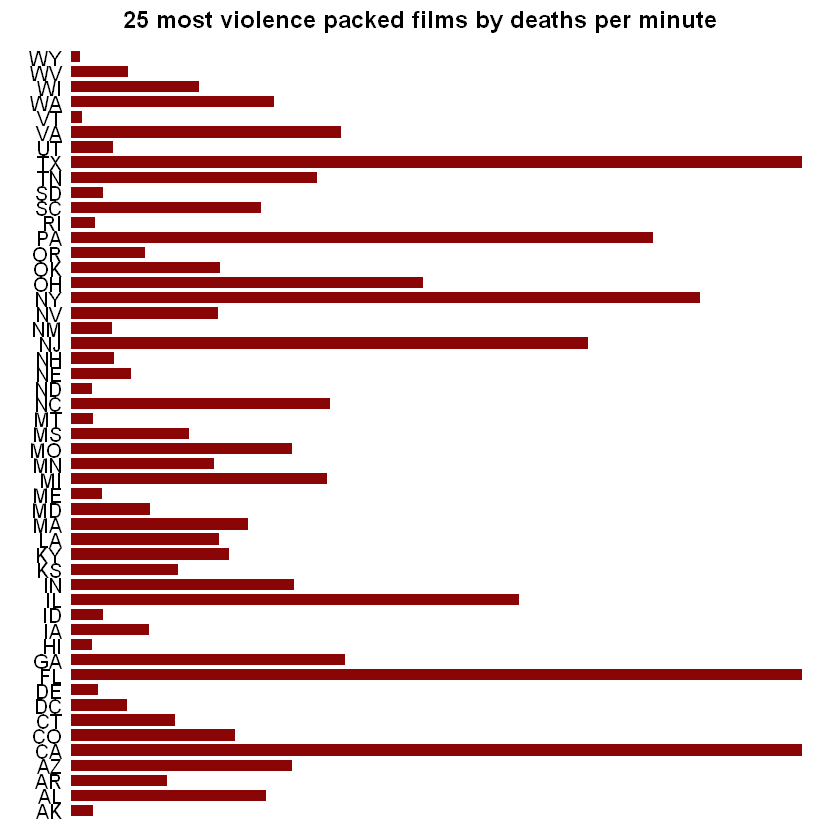

In [184]:
graph <- update(
  graph,
  main='25 most violence packed films by deaths per minute',    # Title of the barchart
  par.settings = my.bloody.theme,                               # Use custom theme
  xlab = NULL,                                                  # Remove label of x axis
  scales=list(x=list(at=NULL)),                                 # Remove rest of x axis
  xlim = c(0, 6.7),                                             # Set graph limits along x axis to accomodate the additional text (requires some trial and error)
  box.width=0.75)                                               # Default bar width is a bit small. Make it bigger)

print(graph)

In [158]:
nata <- ggplot(usstates1, aes(percent, Provider.State)) +
        geom_segment(aes(x = 0, y = Provider.State, xend = percent, yend = Provider.State), color = "grey50") +
        geom_point()
nata

[1] 51  3

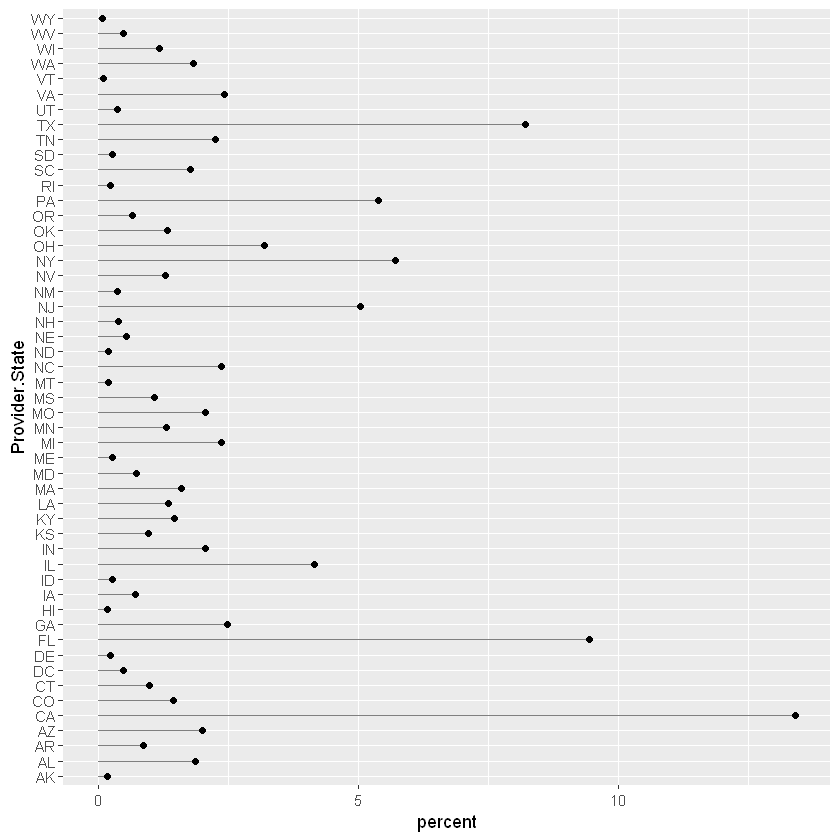

In [128]:
nata <- ggplot(usstates1, aes(percent, Provider.State)) +
        geom_segment(aes(x = 0, y = Provider.State, xend = percent, yend = Provider.State), color = "grey50") +
        geom_point()
nata

In [129]:
mapk <- usstates1 %>%
        select(Provider.State, totalc) %>%
        arrange(Provider.State) %>%
        mutate(Avg = mean(totalc, na.rm = TRUE),
               Above = ifelse(totalc - Avg > 0, TRUE, FALSE),
               county = factor(Provider.State, levels = .$Provider.State))

head(mapk)

Provider.State,totalc,Avg,Above,county
AK,64999896,678460220,FALSE,AK
AL,644582325,678460220,FALSE,AL
AR,304387603,678460220,FALSE,AR
AZ,691051363,678460220,TRUE,AZ
CA,4639094294,678460220,TRUE,CA
CO,502649368,678460220,FALSE,CO


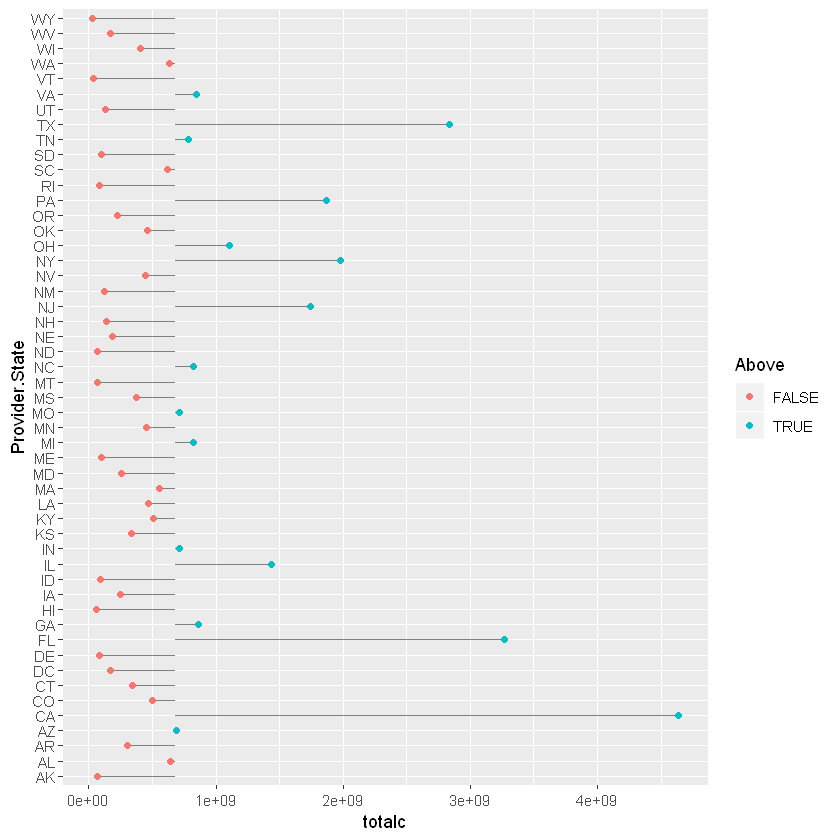

In [130]:
ggplot(mapk, aes(totalc, Provider.State, color = Above)) +
        geom_segment(aes(x = Avg, y = Provider.State, xend = totalc, yend = Provider.State), color = "grey50") +
        geom_point()

Most common hospital discharges within 3 years, and how it changed over time. "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC	" is leading

In [162]:
library(lattice)        # Very versatile graphics package
library(latticeExtra)

In [170]:
head(kak)

DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,597736,0.08096455
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,510632,0.06916614
291 - HEART FAILURE & SHOCK W MCC,359442,0.04868714
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,215525,0.02919330
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,165613,0.02243262
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,157851,0.02138124


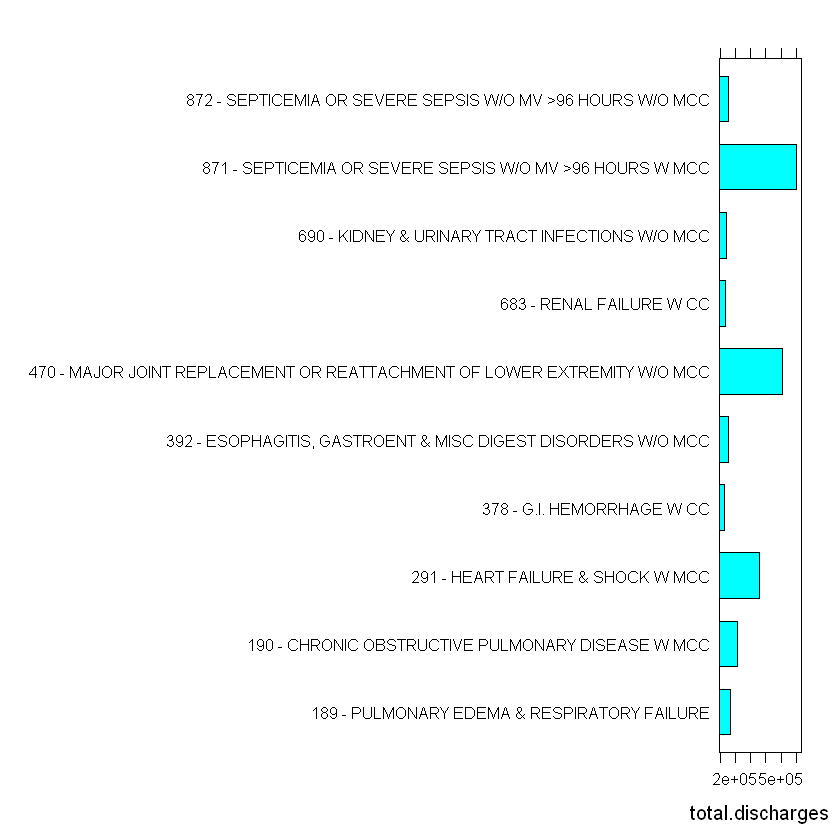

In [171]:
graph <- barchart(DRG.Definition ~ total.discharges, data = kak)
print(graph)

In [168]:
kak <- head(top10totaldischarges17, 10)

In [164]:
top10totaldischarges15 <- payment %>% filter(Year == 2015) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges15, 10)

top10totaldischarges16 <- payment %>% filter(Year == 2016) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges16, 10)

top10totaldischarges17 <- payment %>% filter(Year == 2017) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges17, 10)

DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,521358,0.07013846
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,463930,0.06241266
291 - HEART FAILURE & SHOCK W MCC,221654,0.02981919
292 - HEART FAILURE & SHOCK W CC,192975,0.02596099
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",182443,0.02454412
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,150680,0.02027103
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,150151,0.02019986
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148886,0.02002968
683 - RENAL FAILURE W CC,147311,0.01981780
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,144595,0.01945241


DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,530050.4,0.07332161
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,462864.6,0.06402783
291 - HEART FAILURE & SHOCK W MCC,233015.0,0.03223285
292 - HEART FAILURE & SHOCK W CC,181587.0,0.02511884
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",165909.1,0.02295013
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,151092.0,0.02090048
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,144212.0,0.01994877
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,142982.0,0.01977863
683 - RENAL FAILURE W CC,141759.0,0.01960945
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,137674.0,0.01904438


DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,597736,0.08096455
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,510632,0.06916614
291 - HEART FAILURE & SHOCK W MCC,359442,0.04868714
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,215525,0.02919330
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,165613,0.02243262
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,157851,0.02138124
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",155843,0.02110925
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,138497,0.01875970
683 - RENAL FAILURE W CC,134011,0.01815206
378 - G.I. HEMORRHAGE W CC,131163,0.01776629


Most common hospital discharges
Ten most common inpatient diagnoses
Most expensive inpatient diagnoses

 Variation of hospital charges for heart implant or implant of heart assist system surgery